In [144]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import os

In [ ]:
drivers = pd.read_csv(r"..files/input/drivers.csv",
                      sep=",",thousands=None, decimal=".")
drivers.head()

,driverId,name,ssn,location,certified,wage-plan
0,10,George Vetticaden,621011971,244-4532 Nulla Rd.,N,miles
1,11,Jamie Engesser,262112338,366-4125 Ac Street,N,miles
2,12,Paul Coddin,198041975,Ap #622-957 Risus. Street,Y,hours
3,13,Joe Niemiec,139907145,2071 Hendrerit. Ave,Y,hours
4,14,Adis Cesir,820812209,Ap #810-1228 In St.,Y,hours


In [ ]:
timesheet= pd.read_csv(r"..files/input/timesheet.csv",
                      sep=",",thousands=None, decimal=".")
display(timesheet.head())
timesheet.shape

,driverId,week,hours-logged,miles-logged
0,10,1,70,3300
1,10,2,70,3300
2,10,3,60,2800
3,10,4,70,3100
4,10,5,70,3200


(1768, 4)

In [147]:
mean_timesheet = timesheet.groupby("driverId").mean() #key colum is the driversID which it's grouped by, then calculates the mean for all other columns
mean_timesheet.head()

,week,hours-logged,miles-logged
driverId,,,
10,26.5,62.153846,2829.807692
11,26.5,70.038462,3448.076923
12,26.5,50.750000,2614.653846
13,26.5,52.442308,2579.346154
14,26.5,53.480769,2627.384615


In [148]:
#Revmoval of not needed columns
timesheet.pop("week")
new_mean_timesheet = timesheet.groupby("driverId").mean()
new_mean_timesheet.head()

,hours-logged,miles-logged
driverId,,
10,62.153846,2829.807692
11,70.038462,3448.076923
12,50.750000,2614.653846
13,52.442308,2579.346154
14,53.480769,2627.384615


In [149]:
# Values exclusively under the mean
mean_hours_logged_by_driver = timesheet.groupby("driverId")["hours-logged"].transform("mean") #Transfomr make the column you chose have an specific value (in this case the mean) for each driverId registree. e.g: all registries with driverId = 10 would have that same mean value
display(mean_hours_logged_by_driver.head(1000))
display(mean_hours_logged_by_driver.shape)

0      62.153846
1      62.153846
2      62.153846
3      62.153846
4      62.153846
         ...    
995    53.076923
996    53.076923
997    53.076923
998    53.076923
999    53.076923
Name: hours-logged, Length: 1000, dtype: float64

(1768,)

In [150]:
mean_timesheet_copy = timesheet.copy()
mean_timesheet_copy["mean_hours_logged"] = mean_hours_logged_by_driver
mean_timesheet_copy

,driverId,hours-logged,miles-logged,mean_hours_logged
0,10,70,3300,62.153846
1,10,70,3300,62.153846
2,10,60,2800,62.153846
3,10,70,3100,62.153846
4,10,70,3200,62.153846
...,...,...,...,...
1763,43,52,2517,52.884615
1764,43,56,2743,52.884615
1765,43,59,2665,52.884615
1766,43,58,2593,52.884615


In [151]:
#Using the mean calculated for each driverId we are going to keep only the entries with hours less than that avg 
timesheet_under = mean_timesheet_copy[mean_timesheet_copy["hours-logged"] < mean_timesheet_copy["mean_hours_logged"]]
display(timesheet_under.head(), timesheet_under.tail())

,driverId,hours-logged,miles-logged,mean_hours_logged
2,10,60,2800,62.153846
9,10,50,2500,62.153846
19,10,30,1200,62.153846
20,10,50,2500,62.153846
25,10,60,2600,62.153846


,driverId,hours-logged,miles-logged,mean_hours_logged
1756,43,51,2701,52.884615
1760,43,46,2671,52.884615
1762,43,50,2572,52.884615
1763,43,52,2517,52.884615
1767,43,48,2764,52.884615


In [152]:
sum_timesheet = timesheet.groupby("driverId").sum() #by grouping and summing, said column becomes the index | to reset index "reset_index()"
display(sum_timesheet)

,hours-logged,miles-logged
driverId,,
10,3232,147150
11,3642,179300
12,2639,135962
13,2727,134126
14,2781,136624
15,2734,138750
16,2746,137205
17,2701,135992
18,2654,137834


In [153]:
maxminfinderhours = timesheet.groupby("driverId")["hours-logged"].agg({"min","max"})
maxminfinderhours

,min,max
driverId,,
10,0,76
11,0,92
12,0,60
13,10,60
14,45,60
15,45,60
16,45,60
17,20,60
18,45,60


In [154]:
summary = pd.merge(
    sum_timesheet, drivers[["driverId","name"]], on="driverId"  #here we are joining info from 2 dataframes
)
summary

,driverId,hours-logged,miles-logged,name
0,10,3232,147150,George Vetticaden
1,11,3642,179300,Jamie Engesser
2,12,2639,135962,Paul Coddin
3,13,2727,134126,Joe Niemiec
4,14,2781,136624,Adis Cesir
5,15,2734,138750,Rohit Bakshi
6,16,2746,137205,Tom McCuch
7,17,2701,135992,Eric Mizell
8,18,2654,137834,Grant Liu
9,19,2738,137968,Ajay Singh


In [ ]:
if not os.path.exists(r"..files/output"):
    os.makedirs(r"..files/output")

summary.to_csv(r"..files/output/summary.csv",
               sep=",", header=True, index=False)

In [156]:
top10 = summary.sort_values(by="miles-logged", ascending=False).head(10)
top10

,driverId,hours-logged,miles-logged,name
1,11,3642,179300,Jamie Engesser
0,10,3232,147150,George Vetticaden
23,33,2759,139285,Sridhara Sabbella
15,25,2723,139180,Jean-Philippe Playe
29,39,2745,138788,David Kaiser
5,15,2734,138750,Rohit Bakshi
25,35,2728,138727,Emil Siemes
11,21,2751,138719,Jeff Markham
31,41,2723,138407,Greg Phillips
19,29,2760,138255,Teddy Choi


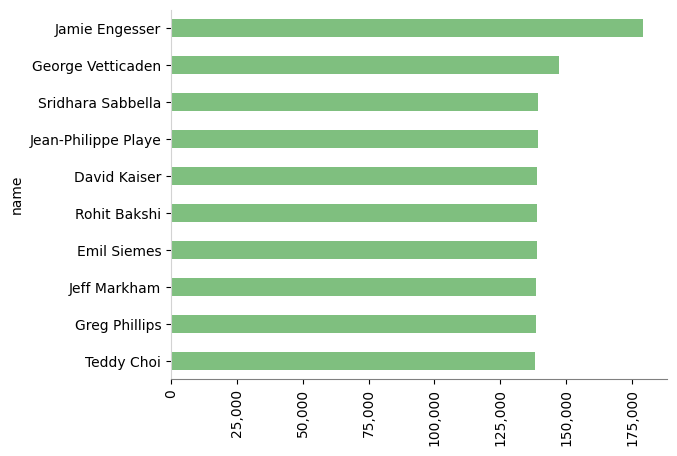

In [ ]:
top10 = top10.set_index("name")

top10["miles-logged"].plot.barh(color="green", alpha=0.5)
plt.gca().invert_yaxis()

plt.gca().get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
)

plt.xticks(rotation=90)

plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

if not os.path.exists(r"..files/files/plots"):
    os.makedirs(r"..files/files/plots")

plt.savefig(r"..files/plots/top10_drivers.png",
               bbox_inches = "tight")
